<a href="https://colab.research.google.com/github/lizarani978/Python/blob/master/prediction_of_employee_burn_out_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv', index_col=None)

In [ ]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0)


In [ ]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
df.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29


In [ ]:
df.shape

(18590, 9)

In [ ]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.877893,0.691823,0.736412
Resource Allocation,0.877893,1.000000,0.799563,0.855005
Mental Fatigue Score,0.691823,0.799563,1.000000,0.944389
Burn Rate,0.736412,0.855005,0.944389,1.000000


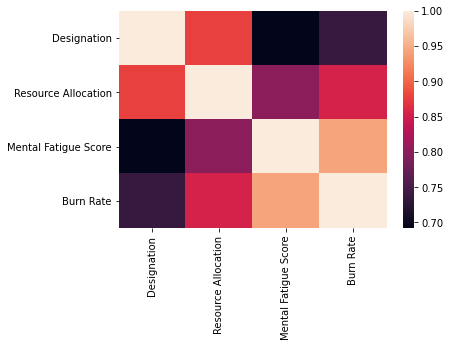

In [ ]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [ ]:
emp_MentalFatigueScore_satisfaction = df['Mental Fatigue Score'].mean()
emp_BurnRate_satisfaction = df[df['Burn Rate']==1]['Mental Fatigue Score'].mean()

print( 'The mean for the Mental Fatigue Score is: ' + str(emp_MentalFatigueScore_satisfaction) )
print( 'The mean for the employees that had a Burn Rate is: ' + str(emp_BurnRate_satisfaction) )

The mean for the Mental Fatigue Score is: 5.732173211403983
The mean for the employees that had a Burn Rate is: 9.706153846153846


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [ ]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [ ]:
target_name = 'Burn Rate'
X = df.drop('Burn Rate', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [ ]:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
print ("RMSE is %2.2f" % np.sqrt(mean_squared_error(y_test, y_base_rate)))

RMSE is 0.49


In [ ]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [ ]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(X_train,y_train)

y_pred = lgb.predict(X_test)
print ("RMSE is %2.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE is 0.05


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print ("RMSE is %2.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE is 0.05


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

In [ ]:


classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

trainingData    = np.array([ [2.3, 4.3, 2.5],  [1.3, 5.2, 5.2],  [3.3, 2.9, 0.8],  [3.1, 4.3, 4.0]  ])
trainingScores  = np.array( [3.4, 7.5, 4.5, 1.6] )
predictionData  = np.array([ [2.5, 2.4, 2.7],  [2.7, 3.2, 1.2] ])

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[3.87234245 4.18138031] 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
[1.37046646 3.26931323] 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
[4.24785862 4.24601844] 

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_ite